# 09-1 순차 데이터와 순환 신경망

## 순차 데이터

**순차 데이터**sequential data는 텍스트나 **시계열 데이터**time series data와 같이 순서에 의미가 있는 데이터를 말합니다. 예를 들어 "I am a boy"는 쉽게 이해할 수 있지만 "boy am a I"는 말이 되지 않습니다. 또 일별 온도를 기록한 데이터에서 날짜 순서를 뒤죽박죽 섞는다면 내일의 온도를 쉽게 예상하기 어렵습니다.

지금까지 우리가 보았던 데이터는 순서와는 상관 없었습니다.

이 장에서 사용하려는 댓글, 즉 텍스트 데이터는 단어의 순서가 중요한 순차 데이터입니다. 이런 데이터는 순서를 유지하며 신경망에 주입해야 합니다. 단어의 순서를 마구 섞어서 주입하면 안 됩니다.

완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없습니다. 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않습니다.

이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 **피드포워드 신경망**feedforward neural network, FFNN이라고 합니다. 이전 장에서 배웠던 완전 연결 신경망과 합성곱 신경망이 모두 피드포워드 신경망에 속합니다.

신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해서는 이렇게 데이터 흐름이 앞으로만 전달되어서는 곤란합니다. 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있죠. 이런 신경망이 바로 순환 신경망입니다.

## 순환 신경망

**순환 신경망**recurrent neural network, RNN은 일반적인 완전 연결 신경망과 거의 비슷합니다. 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 됩니다. 다음 그림에서 은닉층에 있는 붉은 고리를 눈여겨 보세요!

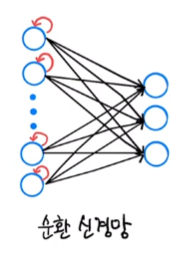

O는 출력된 결과입니다. 첫 번째 샘플 A를 처리하고 난 출력(OA)이 다시 뉴런으로 들어갑니다.

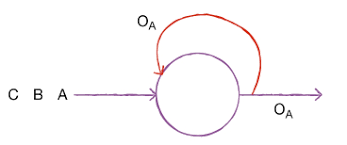

이 출력에는 A에 대한 정보가 다분히 들어 있겠죠. 그다음 B를 처리할 때 앞에서 A를 사용해 만든 출력 OA 를 함께 사용합니다.

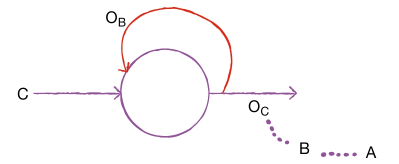

따라서 OA와 B를 사용해서 만든 OB에는 A에 대한 정보가 어느정도 포함되어 있을 것입니다. 그다음 C를 처리할 때는 OB를 함께 사용합니다.

OC에 B와 A에 대한 정보가 담겨 있다고 말할 수 있습니다.

물론 OC에는 A에 대한 정보보다는 B에 대한 정보가 더 많을 것입니다. 그래서 순환 신경망에서는 '이전 샘플에 대한 기억을 가지고 있다'고 종종 말합니다. 이렇게 샘플을 처리하는 한 단계를 **타임스텝**timestep이라고 말합니다.

순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래될수록 순환되는 정보는 희미해집니다.

순환 신경망에서는 특별히 층을 **셀**cell이라고 부릅니다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현합니다. 또 셀의 출력을 **은닉 상태**hidden state라고 부릅니다.

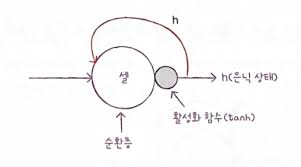

다음 그림처럼 순환 신경망을 타임스텝마다 그릴 수 있는데요, 이런 그림을 보고 셀을 타임스텝으로 펼쳤다고 말합니다.

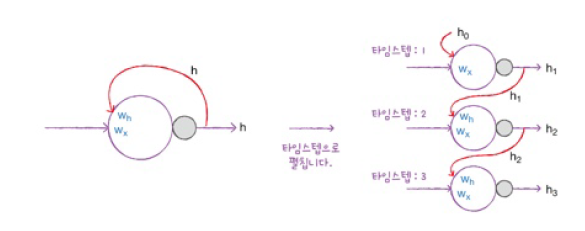

타임스텝 1에서 셀의 출력 h1이 타임스텝 2의 셀로 주입됩니다. 이때 wh와 곱해집니다. 마찬가지로 타임스텝 2에서 셀의 출력 h2가 타임스텝 3의 셀로 주입됩니다. 이때에도 wh와 곱해집니다.

여기에서 알 수 있는 것은 모든 타임스텝에서 사용되는 가중치는 wh 하나라는 점입니다.

## 셀의 가중치와 입출력

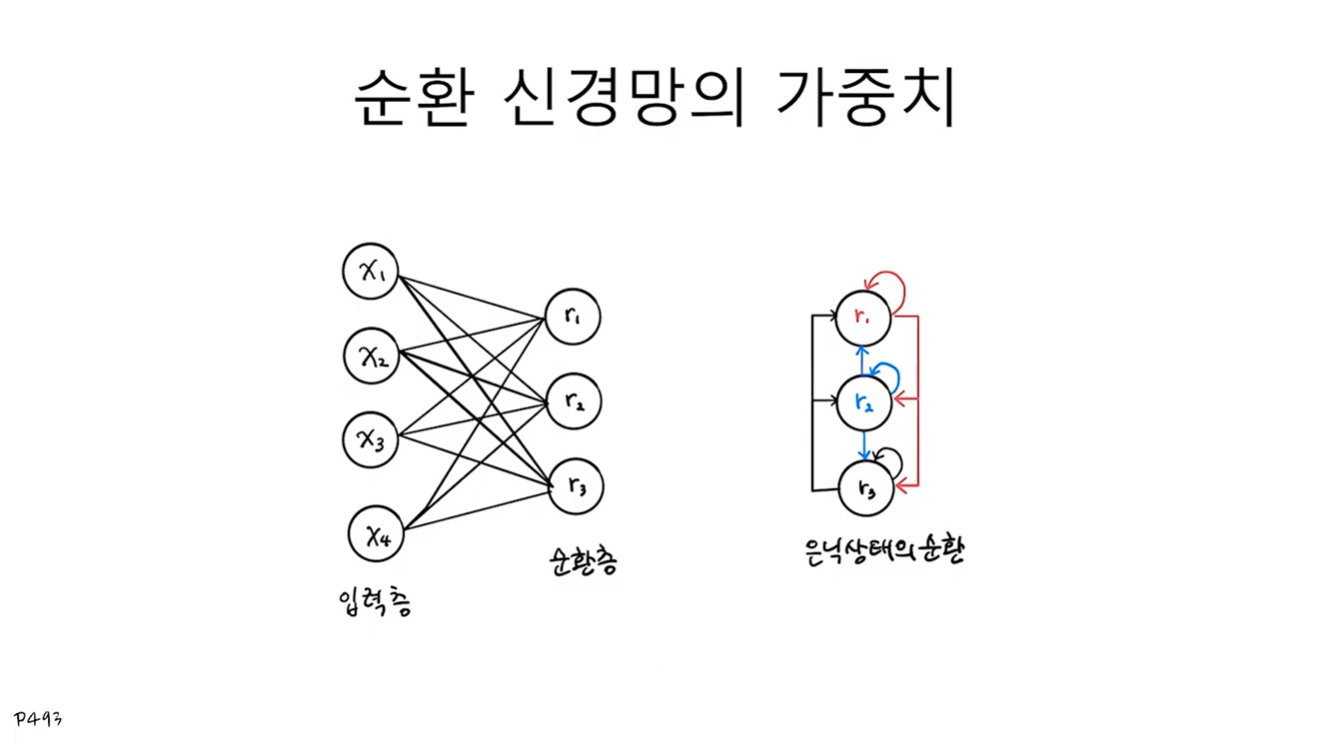

순환층에 있는 첫 번째 뉴런(r1)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달됩니다. 즉 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결됩니다!

...

마지막으로 출력층의 구성에 대해 알아보겠습니다. 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류합니다. 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용합니다. 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용합니다.

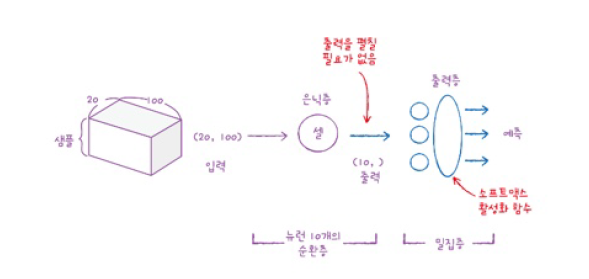

## 마무리

### 핵심 포인트

- **순차 데이터**: 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터   
- **순환 신경망**: 순차 데이터에 잘 맞는 인공 신경망의 한 종류   
- **셀**: 순환 신경망에서 종종 순환층을 부르는 말
- **은닉 상태**: 순환 신경망에서는 셀의 출력을 부르는 말